# Multi-layer Perceptron Regression

In this notebook we will learn how to use a MLP for regression tasks using the <a href="https://scikit-learn.org/stable/" target="_blank">scikit-learn</a> library. 

**Note**: If you are running this in [a colab notebook](https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/MNIST.ipynb), you should install the dependencies by running the following cell:

In [1]:
! pip install scikit-learn matplotlib numpy

As in the previous notebook, we are going to use the synthetic dataset generated from sinus curve with some added noise.

In [2]:
import numpy as np
np.random.seed(0)

# X is our input data for training
X_train = np.sort(5 * np.random.rand(40, 1), axis=0)
# y is the target variable
y_train = np.sin(X_train).ravel()
# Add noise to targets
y_train[::5] += 1 * (0.5 - np.random.rand(8))


We are going to use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html"><code>MLPRegressor</code></a> class from the <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network"><code>sklearn.neural_network</code></a> module. MLPRegressor trains iteratively since at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters. By default the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html"><code>MLPRegressor</code></a> model optimizes the **squared-loss** function.

The <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html"><code>MLPRegressor</code></a> class constructor has lots of parameters that allow us to configure the arquitecture of the neural network as well as the optimization algorithm. In this notebook we will use only the most relevants for a simple regression problem:

<table>
<tr>
    <td width="40%" style="text-align:left"><code><b>hidden_layer_sizes:</b> tuple, default=(100,)</code></td>
    <td width="60%">Each tuple element is the number of neurons in a hidden layer of the MLP.<br>For example, if we want a MLP with two hidden layers and 512 neurons each we set this parameter to <code>(512,512)</code>.</td>
</tr>
<tr>
    <td width="40%" style="text-align:left"><code><b>activation:</b> {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’</code></td>
    <td width="60%">Activation function for the hidden layers.</td>
</tr>
<tr>
    <td width="40%" style="text-align:left"><code><b>solver:</b> </code> {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’</td>
    <td width="60%">The solver algorithm for weight optimization. ‘sgd’ refers to stochastic gradient descent.</td>
</tr>
<tr>
    <td width="40%" style="text-align:left"><code><b>learning_rate_init:</b> </code>double, default=0.001</td>
    <td width="60%">The initial learning rate used.</td>
</tr>
<tr>
    <td width="40%" style="text-align:left"><code><b>random_state:</b> </code>int, RandomState instance, default=None</td>
    <td width="60%">Determines random number generation for weights and bias initialization. Pass an int for reproducible results across multiple function calls.</td>
</tr>
<tr>
    <td width="40%" style="text-align:left"><code><b>max_iter:</b> </code> int, default=200</td>
    <td width="60%">Maximum number of iterations.</td>
</tr>
<tr>
    <td width="40%" style="text-align:left"><code><b>verbose:</b> </code> bool, default=False</td>
    <td width="60%">Whether to print progress messages or not. Useful to visualize the value of the loss at each iteration.</td>
</tr>
</table>

The following code creates a MLP regressor and fits it to our training data with the <code>fit()</code> method. 



In [3]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(hidden_layer_sizes=(16,16), solver='sgd', learning_rate_init=0.01, 
                    random_state=1, max_iter=200, verbose=True)

# Fit regression model
regr.fit(X_train, y_train)

Iteration 1, loss = 0.37634003
Iteration 2, loss = 0.31803000
Iteration 3, loss = 0.26432905
Iteration 4, loss = 0.22601086
Iteration 5, loss = 0.20521266
Iteration 6, loss = 0.19773035
Iteration 7, loss = 0.19830949
Iteration 8, loss = 0.20122392
Iteration 9, loss = 0.20207745
Iteration 10, loss = 0.19921172
Iteration 11, loss = 0.19284986
Iteration 12, loss = 0.18415179
Iteration 13, loss = 0.17469536
Iteration 14, loss = 0.16566904
Iteration 15, loss = 0.15777664
Iteration 16, loss = 0.15135156
Iteration 17, loss = 0.14649966
Iteration 18, loss = 0.14263020
Iteration 19, loss = 0.13919764
Iteration 20, loss = 0.13575232
Iteration 21, loss = 0.13198014
Iteration 22, loss = 0.12781311
Iteration 23, loss = 0.12337695
Iteration 24, loss = 0.11885146
Iteration 25, loss = 0.11448849
Iteration 26, loss = 0.11043760
Iteration 27, loss = 0.10677971
Iteration 28, loss = 0.10347239
Iteration 29, loss = 0.10036207
Iteration 30, loss = 0.09734243
Iteration 31, loss = 0.09435601
Iteration 32, los

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(16, 16), learning_rate='constant',
             learning_rate_init=0.01, max_fun=15000, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='sgd', tol=0.0001,
             validation_fraction=0.1, verbose=True, warm_start=False)

Let's visualize the output regression for the learned model:

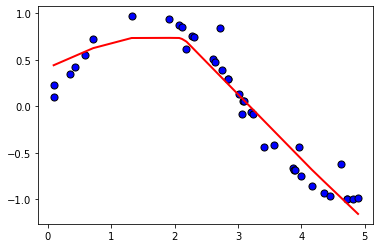

In [4]:
import matplotlib.pyplot as plt

# Plot the regression line
plt.plot(X_train, regr.predict(X_train), color='r', lw=2)

# Plot the training data points
plt.scatter(X_train, y_train, facecolor="b", edgecolor="k", s=50)
